<a href="https://colab.research.google.com/github/manasamorthad/Machine-Learning/blob/main/ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [57]:
df=pd.read_csv("/content/diabetes_DT (1).csv")

In [58]:
[col for col in df.columns if df[col].isnull().sum()>0]

[]

In [59]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [60]:
X=df.drop("Outcome",axis=1)
y=df["Outcome"]

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

1. Comparing Single vs. Ensemble Classifiers
Task:
Write a program that demonstrates the advantage of ensemble learning compared to a
single classifier.
Apply a Decision Tree and a Random Forest (RF) classifier on a given dataset.
Compare their performance using evaluation metrics such as accuracy, precision, recall,
and F1-score.
Explore the effect of changing the number of estimators (decision trees) in Random
Forest. Write clear observations with justification.

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [9]:
clf=DecisionTreeClassifier(random_state=42)
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [10]:
print("accuracy is",metrics.accuracy_score(y_test,y_pred))
print("precison is",metrics.precision_score(y_test,y_pred))
print("recall is",metrics.recall_score(y_test,y_pred))
print("f1-score is",metrics.f1_score(y_test,y_pred))

accuracy is 0.7012987012987013
precison is 0.5555555555555556
recall is 0.6875
f1-score is 0.6145251396648045


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf=RandomForestClassifier(n_estimators=50,random_state=0)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [13]:
print("accuracy is",metrics.accuracy_score(y_test,y_pred_rf))
print("precison is",metrics.precision_score(y_test,y_pred_rf))
print("recall is",metrics.recall_score(y_test,y_pred_rf))
print("f1-score is",metrics.f1_score(y_test,y_pred_rf))

accuracy is 0.7316017316017316
precison is 0.618421052631579
recall is 0.5875
f1-score is 0.6025641025641025


| Metric        | Decision Tree | Random Forest |
| ------------- | ------------- | ------------- |
| **Accuracy**  | 0.7013        | 0.7316        |
| **Precision** | 0.5556        | 0.6184        |
| **Recall**    | 0.6875        | 0.5875        |
| **F1-score**  | 0.6145        | 0.6026        |
        |


In [14]:
rf=RandomForestClassifier(  n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='entropy',
    random_state=0)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

In [15]:
print("accuracy is",metrics.accuracy_score(y_test,y_pred_rf))
print("precison is",metrics.precision_score(y_test,y_pred_rf))
print("recall is",metrics.recall_score(y_test,y_pred_rf))
print("f1-score is",metrics.f1_score(y_test,y_pred_rf))

accuracy is 0.7619047619047619
precison is 0.654320987654321
recall is 0.6625
f1-score is 0.6583850931677019


| **Metric**    | **DT**     | **RF (50)** | **RF (Tuned)** |
| ------------- | ---------- | ----------- | -------------- |
| **Accuracy**  | 0.7013     | 0.7316      | **0.7619**     |
| **Precision** | 0.5556     | 0.6184      | **0.6543**     |
| **Recall**    | **0.6875** | 0.5875      | 0.6625         |
| **F1-Score**  | 0.6145     | 0.6026      | **0.6584**     |


2. Implementing Simple Ensemble Techniques
Task:
Write a program that demonstrates the use of simple ensemble techniques: Max Voting,
Average Voting, and Weighted Average Voting (assign weights based on each model’s
performance).
Apply these techniques on a suitable dataset and compare results.


In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
from sklearn.ensemble import VotingClassifier

In [18]:
estimators = [
    ('lr', LogisticRegression(max_iter=200, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
]

# Create Voting Classifier - Hard Voting
hard_voting = VotingClassifier(estimators=estimators, voting='hard')

# Train the ensemble
hard_voting.fit(x_train, y_train)

# Make predictions
y_pred = hard_voting.predict(x_test)

# Evaluate Accuracy
score = metrics.accuracy_score(y_test, y_pred)
print("Hard Voting Accuracy: {:.3f}".format(score))


Hard Voting Accuracy: 0.749


In [19]:
soft_voting = VotingClassifier(estimators=estimators, voting='soft')
soft_voting.fit(x_train, y_train)
y_pred_soft = soft_voting.predict(x_test)
print("Soft Voting Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred_soft)))


Soft Voting Accuracy: 0.736


In [20]:
lr = LogisticRegression(max_iter=200, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

w1 = metrics.accuracy_score(y_test, lr.predict(x_test))
w2 = metrics.accuracy_score(y_test, dt.predict(x_test))
w3 = metrics.accuracy_score(y_test, rf.predict(x_test))

weighted_voting = VotingClassifier(
    estimators=estimators,
    voting='soft',           # soft voting with probabilities
    weights=[w1, w2, w3]     # weights based on model performance
)
weighted_voting.fit(x_train, y_train)
y_pred_weighted = weighted_voting.predict(x_test)
print("Weighted Voting Accuracy: {:.3f}".format(metrics.accuracy_score(y_test, y_pred_weighted)))

Weighted Voting Accuracy: 0.736


3. Hard Voting vs. Soft Voting Classifiers
Task:
Write a program to show the difference between Hard Voting and Soft Voting classifiers
in ensemble learning using multiple base learners (e.g., Decision Tree, Logistic
Regression, and KNN).


In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
estimators = [
    ('lr', LogisticRegression(max_iter=200, random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

# --- Hard Voting ---
hard_voting = VotingClassifier(estimators=estimators, voting='hard')
hard_voting.fit(x_train, y_train)
y_pred_hard = hard_voting.predict(x_test)

# --- Soft Voting ---
soft_voting = VotingClassifier(estimators=estimators, voting='soft')
soft_voting.fit(x_train, y_train)
y_pred_soft = soft_voting.predict(x_test)

# --- Evaluation ---
print("Hard Voting Metrics:")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred_hard),3))
print("Precision:", round(metrics.precision_score(y_test, y_pred_hard, average='macro'),3))
print("Recall:", round(metrics.recall_score(y_test, y_pred_hard, average='macro'),3))
print("F1-Score:", round(metrics.f1_score(y_test, y_pred_hard, average='macro'),3))
print()

print("Soft Voting Metrics:")
print("Accuracy:", round(metrics.accuracy_score(y_test, y_pred_soft),3))
print("Precision:", round(metrics.precision_score(y_test, y_pred_soft, average='macro'),3))
print("Recall:", round(metrics.recall_score(y_test, y_pred_soft, average='macro'),3))
print("F1-Score:", round(metrics.f1_score(y_test, y_pred_soft, average='macro'),3))

Hard Voting Metrics:
Accuracy: 0.719
Precision: 0.692
Recall: 0.7
F1-Score: 0.695

Soft Voting Metrics:
Accuracy: 0.71
Precision: 0.686
Recall: 0.696
F1-Score: 0.689


4. Exploring Bagging Technique (Random Forest)
Task:
Write a program to explore the Bagging technique using the RandomForestClassifier on a
suitable dataset.
Experiment with parameters such as number of estimators, maximum depth, and random
state.
Write detailed observations and justify the changes in model performance.

In [25]:
n_estimators_list = [5, 10, 50, 100]
max_depth_list = [2, 4, 6, None]
accuracy_results = []

for n in n_estimators_list:
    for d in max_depth_list:
        model = RandomForestClassifier(
            n_estimators=n, max_depth=d, random_state=42
        )
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = metrics.accuracy_score(y_test, y_pred)
        accuracy_results.append((n, d, acc))

# Step 5: Display results
print("Results:")
for n, d, acc in accuracy_results:
    print(f"n_estimators={n}, max_depth={d}, Accuracy={acc:.3f}")

Results:
n_estimators=5, max_depth=2, Accuracy=0.723
n_estimators=5, max_depth=4, Accuracy=0.732
n_estimators=5, max_depth=6, Accuracy=0.723
n_estimators=5, max_depth=None, Accuracy=0.719
n_estimators=10, max_depth=2, Accuracy=0.736
n_estimators=10, max_depth=4, Accuracy=0.745
n_estimators=10, max_depth=6, Accuracy=0.758
n_estimators=10, max_depth=None, Accuracy=0.740
n_estimators=50, max_depth=2, Accuracy=0.749
n_estimators=50, max_depth=4, Accuracy=0.766
n_estimators=50, max_depth=6, Accuracy=0.749
n_estimators=50, max_depth=None, Accuracy=0.740
n_estimators=100, max_depth=2, Accuracy=0.745
n_estimators=100, max_depth=4, Accuracy=0.753
n_estimators=100, max_depth=6, Accuracy=0.749
n_estimators=100, max_depth=None, Accuracy=0.753


In [27]:
import matplotlib.pyplot as plt


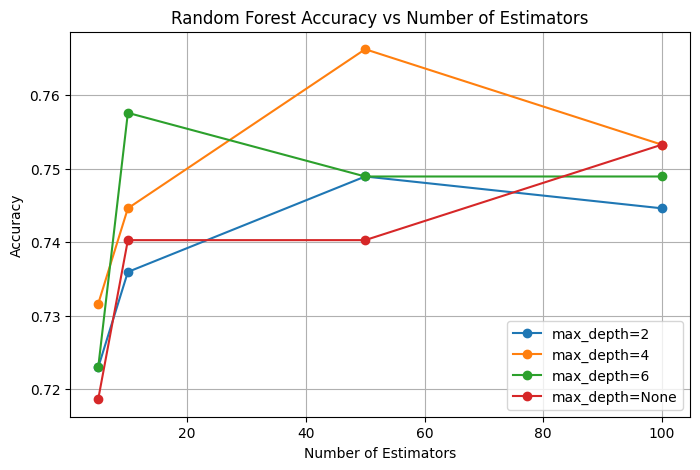

In [28]:
plt.figure(figsize=(8, 5))
for d in max_depth_list:
    plt.plot(
        [n for n, md, _ in accuracy_results if md == d],
        [acc for n, md, acc in accuracy_results if md == d],
        marker="o",
        label=f"max_depth={d}",
    )
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Estimators")
plt.legend()
plt.grid(True)

In [29]:
final_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
final_model.fit(x_train, y_train)
y_pred = final_model.predict(x_test)

print("\nFinal Model Performance (n_estimators=100, max_depth=None):")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n",metrics. confusion_matrix(y_test, y_pred))


Final Model Performance (n_estimators=100, max_depth=None):
Accuracy: 0.7532467532467533
Confusion Matrix:
 [[121  30]
 [ 27  53]]


5. Using RandomForestRegressor and OOB Score
Task:
Write a program using the RandomForestRegressor model to make predictions on a
suitable regression dataset.
Enable and observe the oob_score (Out-of-Bag score) parameter.
Interpret the results and explain its significance.

In [33]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pandas as pd

In [54]:
# Step 2: Load a regression dataset
data = load_diabetes()
x = data.data
y = data.target
# Step 3: Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Step 4: Initialize the RandomForestRegressor with OOB enabled
model = RandomForestRegressor(
    n_estimators=100,
    oob_score=True,          # Enables Out-of-Bag estimation
    random_state=42,
    bootstrap=True           # Must be True for OOB score
)

# Step 5: Train the model
model.fit(x_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(x_test)


In [37]:
# Step 7: Evaluate performance
print("\n🔹 Model Evaluation Results:")
print("OOB Score (from training):", model.oob_score_)
print("R² Score (on test data):", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


🔹 Model Evaluation Results:
OOB Score (from training): 0.42941696635868554
R² Score (on test data): 0.47027066465218703
Mean Absolute Error: 42.75075187969925
Root Mean Squared Error: 53.4756204518168


6. Exploring Boosting Techniques
Task:
Write a program to explore different Boosting techniques using suitable datasets:
Adaptive Boosting (AdaBoost) – binary classification,
Gradient Boosting – classification and regression,
XGBoost,
CatBoost.
Write your observations for each model, highlighting how it improves over the previous
iterations and corrects earlier errors.

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [49]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [43]:
# Base estimator: shallow decision tree (weak learner)
base = DecisionTreeClassifier(max_depth=1)

# AdaBoost model
ada = AdaBoostClassifier(estimator=base, n_estimators=100, learning_rate=0.8, random_state=42)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

print("\n🔹 AdaBoost Classifier Results:")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


🔹 AdaBoost Classifier Results:
Accuracy: 0.7705627705627706


In [45]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)

print("\n🔹 Gradient Boosting Classifier Results:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


🔹 Gradient Boosting Classifier Results:
Accuracy: 0.7489177489177489


In [56]:
from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(x_train, y_train)
y_pred = gb_reg.predict(x_test)

print("🔹 Gradient Boosting Regressor Results:")
print("R² Score:",metrics.r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

🔹 Gradient Boosting Regressor Results:
R² Score: 0.3884579689902158
RMSE: 57.45687158834526


In [48]:
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print("🔹 XGBoost Classifier Results:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

🔹 XGBoost Classifier Results:
Accuracy: 0.7359307359307359


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:09:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [52]:
cat = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=4, verbose=0, random_seed=42)
cat.fit(x_train, y_train)
y_pred = cat.predict(x_test)

print("🔹 CatBoost Classifier Results:")
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

🔹 CatBoost Classifier Results:
Accuracy: 0.7662337662337663


7. Comparative Study of Ensemble Models
Task:
Apply all ensemble models (Bagging, Random Forest, AdaBoost, Gradient Boosting,
XGBoost, and CatBoost) on the same dataset.
Prepare a detailed report comparing their results based on accuracy, training time, model
interpretability, and overfitting/underfitting behavior.

In [63]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier

In [64]:
results = []

# List of models to evaluate
models = {
    "Bagging (DecisionTree)": BaggingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=4, verbose=0, random_seed=42)
}

# Evaluate each model
for name, model in models.items():
    start_time = time.time()
    model.fit(x_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Training Time (s)": round(training_time, 3),
        "Classification Report": classification_report(y_test, y_pred)
    })

# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)
print(results_df[["Model", "Accuracy", "Training Time (s)"]])


                    Model  Accuracy  Training Time (s)
0  Bagging (DecisionTree)  0.731602              0.424
1           Random Forest  0.753247              0.216
2                AdaBoost  0.770563              0.228
3       Gradient Boosting  0.748918              0.229
4                 XGBoost  0.735931              0.038
5                CatBoost  0.766234              0.080


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:21:43] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


8. Visualizing the Ensemble models
 Visualize decision boundaries of ensemble models.
 Compare ensemble performance under noisy or missing data.
 Analyze feature importance across different ensemble algorithms.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:25:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


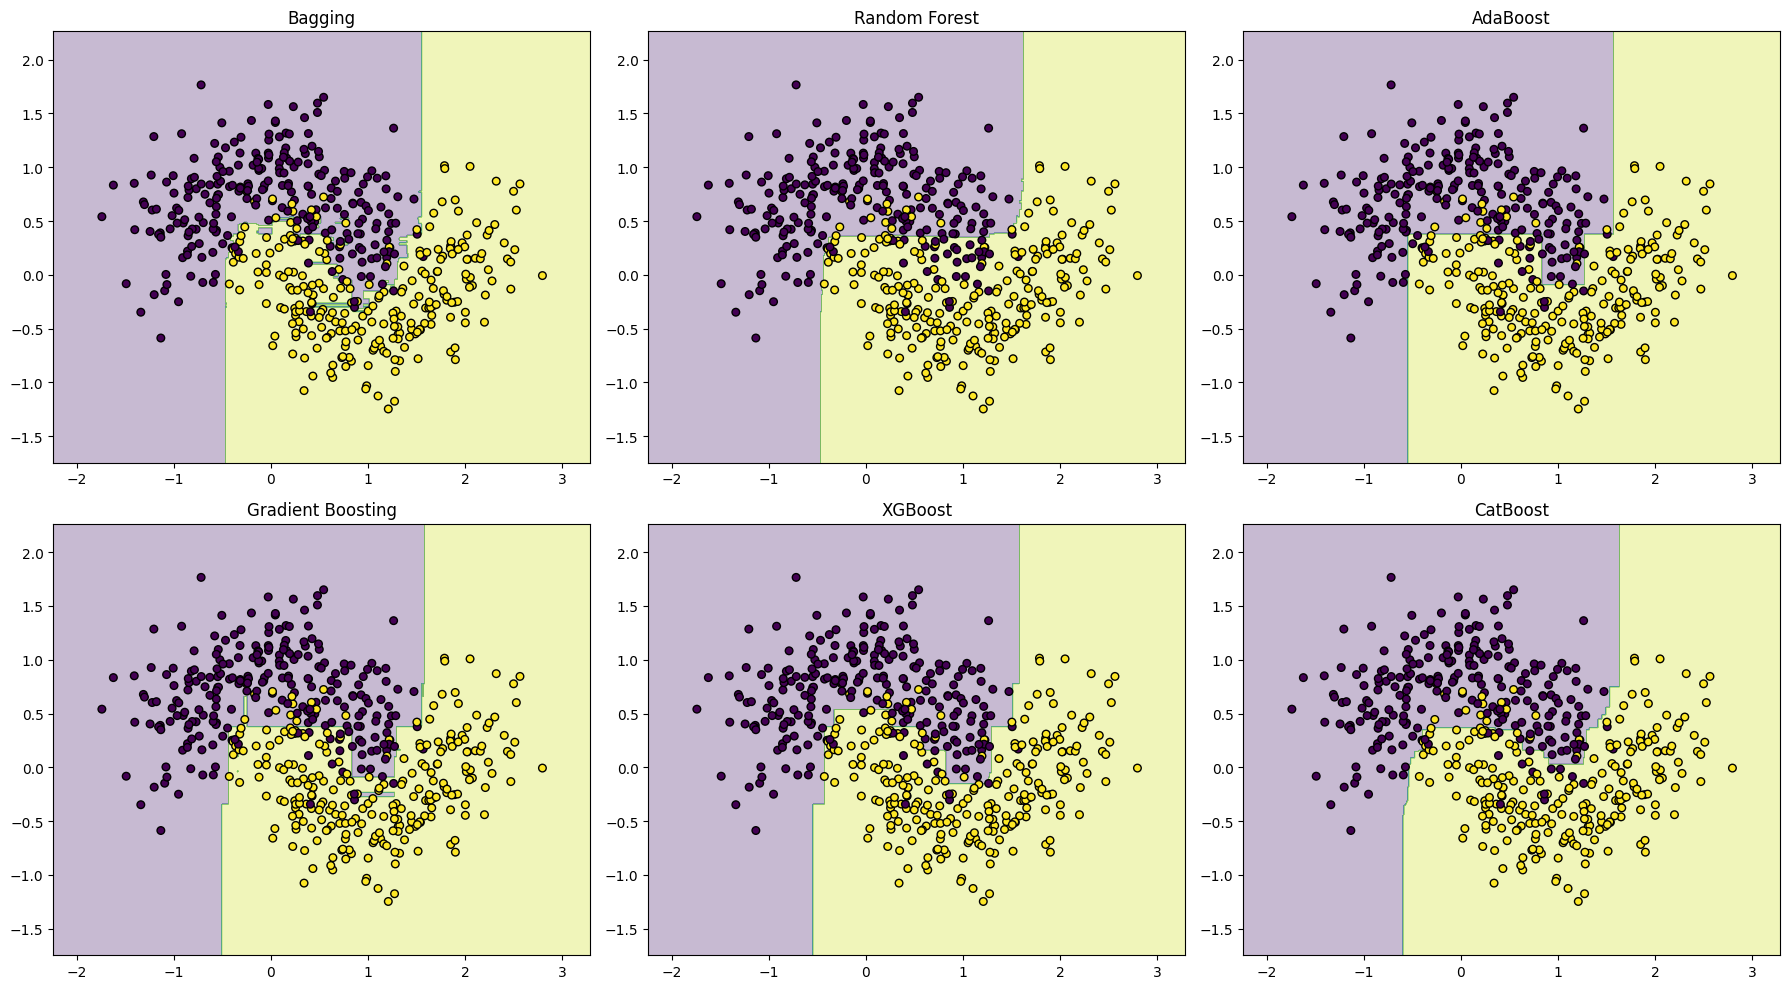

In [65]:
from sklearn.datasets import make_moons
# Create a 2D dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, learning_rate=0.8, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=50, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(iterations=50, learning_rate=0.1, depth=3, verbose=0, random_seed=42)
}

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    ax.set_title(title)

# Plot boundaries for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()
for idx, (name, model) in enumerate(models.items()):
    model.fit(x_train, y_train)
    plot_decision_boundary(model, X, y, axes[idx], name)

plt.tight_layout()
plt.show()

In [66]:
from sklearn.metrics import accuracy_score

# Add Gaussian noise
X_noisy = X + 0.5 * np.random.randn(*X.shape)

results_noisy = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(X_noisy)
    results_noisy[name] = accuracy_score(y, y_pred)

# Display accuracy under noisy data
print("Accuracy under noisy data:")
for name, acc in results_noisy.items():
    print(f"{name}: {acc:.3f}")

Accuracy under noisy data:
Bagging: 0.776
Random Forest: 0.796
AdaBoost: 0.780
Gradient Boosting: 0.780
XGBoost: 0.768
CatBoost: 0.788


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [13:27:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(probability=True, kernel='rbf', random_state=42)

In [71]:
voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svc', svc)],
    voting='soft'  # 'soft' uses predicted probabilities
)

# Train
voting_clf.fit(x_train, y_train)

# Predict
y_pred = voting_clf.predict(x_test)

# Evaluate
print("🔹 Heterogeneous Ensemble (VotingClassifier) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

🔹 Heterogeneous Ensemble (VotingClassifier) Results:
Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        75
           1       0.94      0.89      0.92        75

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150



9. Exploring Heterogeneous Ensemble Models
Task:
Write a program to build a Heterogeneous Ensemble, combining different types of
classifiers such as Decision Tree, K-Nearest Neighbors, Logistic Regression, and
Support Vector Machine (SVM) using a VotingClassifier.
Compare the results with homogeneous ensembles.


In [73]:
homogeneous_models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}
results = {}

# Heterogeneous Ensemble
results['Voting Ensemble'] = accuracy_score(y_test, y_pred)

# Evaluate homogeneous models
for name, model in homogeneous_models.items():
    model.fit(x_train, y_train)
    y_pred_h = model.predict(x_test)
    results[name] = accuracy_score(y_test, y_pred_h)

# Display results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\nComparison of Heterogeneous vs Homogeneous Ensembles:")
print(results_df)


Comparison of Heterogeneous vs Homogeneous Ensembles:
               Model  Accuracy
0    Voting Ensemble  0.920000
1      Random Forest  0.906667
2           AdaBoost  0.873333
3  Gradient Boosting  0.886667


10. Homogeneous vs. Heterogeneous Ensembles – A Comparative Study
Task:
Apply both homogeneous and heterogeneous ensemble techniques (Bagging, Random
Forest, Voting, Stacking) on the same dataset.
Prepare a summary comparing their performance, computational complexity,
interpretability, and robustness.


In [74]:
homogeneous_models = {
    "Bagging (DecisionTree)": BaggingClassifier(n_estimators=100, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.8, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

In [75]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier


In [76]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
lr = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(probability=True, kernel='rbf', random_state=42)

voting_clf = VotingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svc', svc)],
    voting='soft'
)
stacking_clf = StackingClassifier(
    estimators=[('dt', dt), ('knn', knn), ('lr', lr), ('svc', svc)],
    final_estimator=LogisticRegression(),
    passthrough=True
)

In [78]:
import time

# Dictionary to store results
results = {}

# Homogeneous
for name, model in homogeneous_models.items():
    start = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    end = time.time()
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Training Time (s)": round(end - start, 3)
    }

# Heterogeneous
for name, model in [("Voting Ensemble", voting_clf), ("Stacking Ensemble", stacking_clf)]:
    start = time.time()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    end = time.time()
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Training Time (s)": round(end - start, 3)
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T.reset_index().rename(columns={"index":"Model"})
print(results_df)


                    Model  Accuracy  Training Time (s)
0  Bagging (DecisionTree)  0.900000              0.552
1           Random Forest  0.906667              0.315
2                AdaBoost  0.873333              0.377
3       Gradient Boosting  0.886667              0.614
4         Voting Ensemble  0.920000              0.029
5       Stacking Ensemble  0.906667              0.168
